# Data Processing: PyTrends API

A checklist by Spiracular@gmail.com

Testing Pytrends: https://pypi.org/project/pytrends/

I'm also swiping some code from this: https://searchengineland.com/learn-how-to-chart-and-track-google-trends-in-data-studio-using-python-329119

Data source: 

Data description (opt): 

<div style="white-space: pre-wrap; padding: 10px; background-color: #ebebeb;">You can put a bunch of text here
</div>

# Step 0: Libraries and Read In

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook # zoomable

In [2]:
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
#import math

In [ ]:
#from numpy import random

## Step 0.5: Read CSV

In [3]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [12]:
kw_list = ["Blockchain", "Bitcoin", "Ethereum"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

In [13]:
pytrends.interest_over_time()

,Blockchain,Bitcoin,Ethereum,isPartial
date,,,,
2015-09-20,0,2,0,False
2015-09-27,0,2,0,False
2015-10-04,0,2,0,False
2015-10-11,0,2,0,False
2015-10-18,0,2,0,False
...,...,...,...,...
2020-08-16,1,13,2,False
2020-08-23,1,11,2,False
2020-08-30,1,12,2,False


In [14]:
pytrends.get_historical_interest(kw_list, year_start=2018, month_start=1, day_start=1, hour_start=0, year_end=2018, month_end=2, day_end=1, hour_end=0, cat=0, geo='', gprop='', sleep=0)

,Blockchain,Bitcoin,Ethereum,isPartial
date,,,,
2018-01-01 00:00:00,4,70,6,False
2018-01-01 01:00:00,3,72,6,False
2018-01-01 02:00:00,4,72,6,False
2018-01-01 03:00:00,4,72,6,False
2018-01-01 04:00:00,4,69,6,False
...,...,...,...,...
2018-01-31 20:00:00,4,41,5,False
2018-01-31 21:00:00,4,42,5,False
2018-01-31 22:00:00,4,43,6,False


In [15]:
interest_over_time_df = pytrends.interest_over_time()

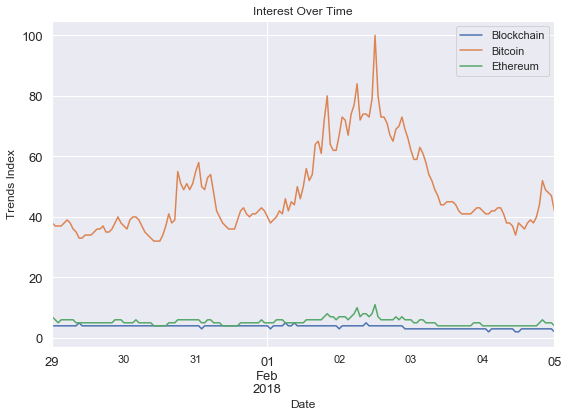

In [16]:
# Let's draw
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
dx = interest_over_time_df.plot.line(figsize = (9,6), title = "Interest Over Time")
dx.set_xlabel('Date')
dx.set_ylabel('Trends Index')
dx.tick_params(axis='both', which='major', labelsize=13)

## Step 0.5: Read CSV

THIS TIME, GEO CHOROPLETH STYLE

(with some help from https://datapane.com/blog/2020/09/01/building-google-trends-report-using-python/ )

In [6]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)

In [12]:
kw_list = ["Bitcoin"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')

In [14]:
pytrends.interest_by_region(resolution='STATE', inc_geo_code=True)

,geoCode,Bitcoin
geoName,,
Alabama,US-AL,45
Alaska,US-AK,73
Arizona,US-AZ,73
Arkansas,US-AR,44
California,US-CA,96
Colorado,US-CO,82
Connecticut,US-CT,75
Delaware,US-DE,57
District of Columbia,US-DC,58


# Step 0.75 Some Preprocessing

I need to convert geocode from `US-AL` to just `AL`, or I have to tell plotly to expect the above format. Altering it sounds easier.

In [47]:
df = pytrends.interest_by_region(resolution='STATE', inc_geo_code=True)

In [48]:
df.head()

,geoCode,Bitcoin
geoName,,
Alabama,US-AL,45
Alaska,US-AK,73
Arizona,US-AZ,73
Arkansas,US-AR,44
California,US-CA,96


In [49]:
df['geoCode'].apply(lambda x: x[3:]).head()

geoName
Alabama       AL
Alaska        AK
Arizona       AZ
Arkansas      AR
California    CA
Name: geoCode, dtype: object

In [50]:
df['geoCode'] = df['geoCode'].apply(lambda x: x[3:])

# Fancier Graphs

with plotly

https://medium.com/@kbrook10/day-8-data-visualization-how-to-use-choropleth-maps-63c0fedfd5e7

Lets see if we can get a basic choropleth working?

In [51]:
import plotly

In [52]:
import plotly.graph_objs as go

In [53]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [54]:
init_notebook_mode(connected=True)

In [55]:
data = dict(type='choropleth', #colorscale = 'YIOrRd',
           locations = df['geoCode'],
           locationmode = 'USA-states',
           text = df['geoCode'],
           z = df['Bitcoin']
           )
#            colorbar = {'title':'Test Choropleth'},
#            marker = dict(line=dict(color = 'rgb(255,255,255)', width=2)))

layout = dict(title = 'Bitcoin Interest Choropleth',
              geo=dict(scope='usa', showlakes=False))

In [56]:
choromap = go.Figure(data=[data], layout=layout)

# RUN THIS FOR A CHOROPLETH MAP

(I couldn't get iplot to work, so it doesn't currently render in jupyter.)

In [57]:
plot(choromap)
# It works!

'temp-plot.html'

In [58]:
iplot(choromap)
# It doesn't work, sadness.

# Step 1: Cleaning and Relabeling

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df.describe()

## Step 1.1: Types and Relabeling

In [ ]:
#df.columns = ["Month", "AntiInf_acetic", "AntiInf_propionic", "AgAp_salicyclic", "AgAp_pyrazones", "Psylep_anxiolytic", "Psylep_hypnotic", "AntiOPD", "Antihistamines"]

In [ ]:
df.head()

## Step 1.2: Nans

In [ ]:
# Get coordinates of nans
s = df.stack(dropna=False) ## See https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html
L = [list(x) for x in s.index[s.isna()]]
print (L)

# STOP AUTO-RUN

In [ ]:
assert False

# Step 2: EDA and Histograms

In [ ]:
df.columns

In [ ]:
colname = "AntiInf_acetic"

####

plt.title("Hist of " + colname)

#plt.hist(df[colname])

sns.distplot(df[colname])

In [ ]:
# Automatically applied column-wise

def mean_normalize(df):
    mean_normalized_df=(df-df.mean())/df.std()
    return mean_normalized_df

def minmax_normalize(df):
    minmax_normalized_df=(df-df.min())/(df.max()-df.min())
    return minmax_normalized_df

In [ ]:
mn_df = mean_normalize(df.loc[:, df.columns != 'Month'])

In [ ]:
mn_df.plot.hist(subplots=True, legend=False, title="Skews")

# Step 3: State Goals

## Inputs

## Outputs

## Brainstorm

In [ ]:
df.head()

## Step 3.1: More Cleaning

# Step 4: Derived Metrics and Pivot Tables

(as needed)